<a href="https://colab.research.google.com/github/Pathway2008/Text_vectorizing/blob/main/criminal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Dataset Info.

train.csv [파일]
84406개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
 절도 : 6년이하, 1천만원 이하
 강도 : 5년??
 상해 : 7년이하, 10년이하 영업정

test.csv [파일]
17289개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소


sample_submission.csv [제출양식]
ID : 샘플 별 고유 id
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
'''

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train  = pd.read_csv('/train.csv')

In [ ]:
test = pd.read_csv('/test.csv')

In [ ]:
print(train.shape)
train.head(3)

(84406, 20)


,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [ ]:
train.dtypes

ID          object
월            int64
요일          object
시간           int64
소관경찰서        int64
소관지역       float64
사건발생거리     float64
강수량(mm)    float64
강설량(mm)    float64
적설량(cm)    float64
풍향         float64
안개         float64
짙은안개       float64
번개         float64
진눈깨비       float64
서리         float64
연기/연무      float64
눈날림        float64
범죄발생지       object
TARGET       int64
dtype: object

In [ ]:
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
print(train['소관경찰서'].value_counts())
print(train['소관지역'].value_counts())
print(train['범죄발생지'].value_counts())


1749    911
539     852
426     663
546     658
338     641
       ... 
1527     83
1546     83
727      73
726      13
1529      1
Name: 소관경찰서, Length: 269, dtype: int64
32.0    4033
31.0    3870
46.0    3553
10.0    3550
28.0    3207
12.0    3050
21.0    2978
24.0    2894
25.0    2748
13.0    2732
20.0    2644
11.0    2543
38.0    2521
41.0    2415
9.0     2362
7.0     2301
8.0     2243
33.0    2065
29.0    1699
53.0    1449
6.0     1428
5.0     1419
48.0    1318
30.0    1311
14.0    1299
19.0    1294
50.0    1175
16.0    1074
26.0    1067
15.0    1064
22.0    1061
44.0    1058
36.0    1055
52.0    1053
40.0    1005
35.0     985
18.0     979
54.0     975
39.0     971
34.0     951
47.0     907
51.0     883
49.0     864
37.0     837
43.0     790
27.0     608
23.0     607
17.0     599
42.0     587
45.0     325
Name: 소관지역, dtype: int64
주거지      36077
차도       25879
인도        6437
편의점       4835
주차장       3262
식당        1806
백화점       1493
주유소       1324
공원         736
학교         728
약국  

In [ ]:
train.isnull().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [ ]:
#y_train = train[['TARGET']]

In [ ]:
train = train.drop(['TARGET'],axis=1)
train.shape

(84406, 19)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
dum = pd.get_dummies(train['TARGET'])
dum

In [ ]:
train = pd.concat([train,dum],axis=1)
y_train = train[['TARGET']]
train = train.drop(['TARGET'],axis=1)
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  0        84406 non-null  uint8  
 20  1        84406 non-null  uint8  
 21  2        844

In [ ]:
corr_train = train.corr().apply(lambda x: round(x ,2))
corr_train

<ipython-input-59-3716e5a5ab16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = train.corr().apply(lambda x: round(x ,2))


,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,0,1,2
월,1.00,0.00,0.02,0.02,0.00,0.07,-0.22,-0.40,-0.05,-0.10,-0.18,0.17,-0.16,-0.15,-0.03,-0.14,-0.00,0.03,-0.03
시간,0.00,1.00,-0.01,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,0.02
소관경찰서,0.02,-0.01,1.00,0.68,-0.12,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.05,0.10,-0.05
소관지역,0.02,-0.00,0.68,1.00,-0.10,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,0.00,-0.00,-0.01,0.00,-0.01,-0.05,0.12,-0.06
사건발생거리,0.00,0.00,-0.12,-0.10,1.00,0.01,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.01,0.01
강수량(mm),0.07,0.00,-0.00,0.00,0.01,1.00,0.14,-0.01,-0.03,0.32,-0.03,0.36,-0.03,-0.01,-0.02,0.08,0.00,0.00,-0.01
강설량(mm),-0.22,-0.00,0.00,-0.00,0.00,0.14,1.00,0.50,0.07,0.14,0.03,-0.06,0.02,0.04,0.06,0.52,0.02,-0.01,-0.01
적설량(cm),-0.40,-0.00,-0.00,-0.01,0.00,-0.01,0.50,1.00,0.17,0.15,0.09,-0.11,0.18,0.01,0.14,0.32,0.01,-0.01,-0.00
풍향,-0.05,0.00,-0.00,-0.00,-0.00,-0.03,0.07,0.17,1.00,0.01,0.04,0.04,-0.06,-0.09,0.00,0.06,0.00,0.00,-0.01
안개,-0.10,-0.00,-0.00,-0.01,-0.00,0.32,0.14,0.15,0.01,1.00,0.17,0.35,0.11,0.13,0.41,0.12,0.01,-0.00,-0.00


In [ ]:
s = corr_train.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(train['월'], ax=ax[0])

In [ ]:
sns.countplot(x='요일',data=train,order = ('월요일','화요일','수요일','목요일','금요일','토요일','일요일'))
print(train.groupby('요일').size())

TARGET
0    36453
1    25397
2    22556
dtype: int64


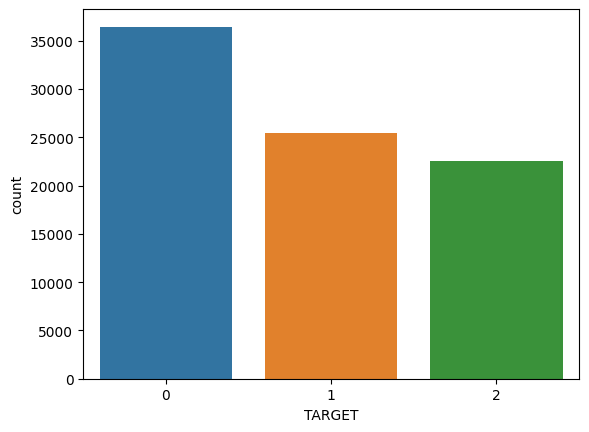

In [ ]:
sns.countplot(x='TARGET',data = y_train)
print(y_train.groupby('TARGET').size())

시간
1     7093
2     6800
3     6681
4     6291
5     6152
6     6119
7     6452
8     7130
9     7374
10    7451
11    7423
12    9440
dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


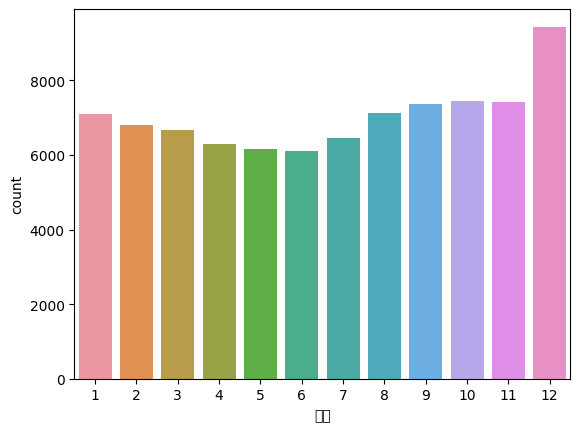

In [ ]:
sns.countplot(x='시간',data = train)
print(train.groupby('시간').size())

1. 주거지와 차도에서 많이발생
2. 주로 밤시간에 많이 발생
3. 평일보단 주말에 많이 발생

In [ ]:
train.head(4)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지


In [ ]:
train.columns

Index(['ID', '월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지'],
      dtype='object')

In [ ]:
test.columns

Index(['ID', '월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label = train['월']
print(label)
print(label.unique())

In [ ]:
label.shape

In [ ]:
label.values.reshape(-1,1).shape

In [ ]:
ohe = OneHotEncoder(sparse = False)
ohe

In [ ]:
ohe.fit(label.values.reshape(-1,1))

In [ ]:
ohe_encode = ohe.transform(label.values.reshape(-1,1))
ohe_encode

In [ ]:
print(type(ohe.categories_))
ohe.categories_

In [ ]:
ohe_month = pd.DataFrame(ohe_encode, columns=ohe.categories_[0])
ohe_month

요일, 소관경찰서, 소관지역, 범죄발생지 만 encoding

In [ ]:
label = train['요일']
label.values.reshape(-1,1).shape
ohe.fit(label.values.reshape(-1,1))

ohe_encode = ohe.transform(label.values.reshape(-1,1))

ohe_week = pd.DataFrame(ohe_encode, columns=ohe.categories_[0])
ohe_week

In [ ]:
label = train['소관경찰서']
label.values.reshape(-1,1).shape
ohe.fit(label.values.reshape(-1,1))

ohe_encode = ohe.transform(label.values.reshape(-1,1))

ohe_office = pd.DataFrame(ohe_encode, columns=ohe.categories_[0])
ohe_office

In [ ]:
label = train['소관지역']
label.values.reshape(-1,1).shape
ohe.fit(label.values.reshape(-1,1))

ohe_encode = ohe.transform(label.values.reshape(-1,1))

ohe_area = pd.DataFrame(ohe_encode, columns=ohe.categories_[0])
ohe_area

In [ ]:
label = train['범죄발생지']
label.values.reshape(-1,1).shape
ohe.fit(label.values.reshape(-1,1))

ohe_encode = ohe.transform(label.values.reshape(-1,1))

ohe_criminal = pd.DataFrame(ohe_encode, columns=ohe.categories_[0])
ohe_criminal

In [ ]:
x_train = pd.concat([train,ohe_week,ohe_office,ohe_area,ohe_criminal],axis=1)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Columns: 359 entries, ID to 호텔/모텔
dtypes: float64(353), int64(3), object(3)
memory usage: 231.2+ MB


In [ ]:
x_train=x_train.drop(['ID','요일','소관경찰서','소관지역','범죄발생지'],axis=1)

Test set

In [ ]:
x_train = pd.read_csv('/train.csv')
x_test = pd.read_csv('/test.csv')

In [ ]:
y_train = x_train['TARGET']
x_train = x_train.drop(['ID', 'TARGET'], axis = 1)

x_test = x_test.drop('ID', axis = 1)

In [ ]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    # x_train데이터에서 존재하지 않았던 값이 x_test 데이터에 존재할 수도 있습니다.
    # 따라서 x_test 데이터를 바로 변형시키지 않고 고윳값을 확인후 x_test 데이터를 변환합니다.
    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

In [ ]:
x_train.head(5)

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,6,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,11,6,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,8,4,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
3,5,3,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
4,9,4,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
x_test.head(5)

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,0,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10
1,5,2,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,5,3,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,11,6,1,1739,31.0,0.878585,0.000000,0.0,0.0,285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,10,1,10,830,15.0,0.496423,26.142857,0.0,0.0,95.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))



# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[['accuracy']])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(x_test)



Epoch 1/50
2638/2638 [==============================] - 9s 3ms/step - loss: 2.4572 - accuracy: 0.3721
Epoch 2/50
2638/2638 [==============================] - 8s 3ms/step - loss: 1.6177 - accuracy: 0.3908
Epoch 3/50
2638/2638 [==============================] - 9s 3ms/step - loss: 1.3346 - accuracy: 0.4025
Epoch 4/50
2638/2638 [==============================] - 7s 3ms/step - loss: 1.2047 - accuracy: 0.4151
Epoch 5/50
2638/2638 [==============================] - 9s 3ms/step - loss: 1.1211 - accuracy: 0.4237
Epoch 6/50
2638/2638 [==============================] - 7s 3ms/step - loss: 1.0731 - accuracy: 0.4383
Epoch 7/50
2638/2638 [==============================] - 9s 3ms/step - loss: 1.0560 - accuracy: 0.4469
Epoch 8/50
2638/2638 [==============================] - 7s 3ms/step - loss: 1.0458 - accuracy: 0.4624
Epoch 9/50
2638/2638 [==============================] - 9s 3ms/step - loss: 1.0368 - accuracy: 0.4751
Epoch 10/50
2638/2638 [==============================] - 7s 3ms/step - loss: 1.030

In [ ]:
y_pred

array([2, 0, 0, ..., 0, 0, 1])

In [ ]:
y_pred = label_encoder.inverse_transform(y_pred.argmax(axis=1))

In [ ]:
submit = pd.read_csv('/sample_submission.csv')

In [ ]:
submit['TARGET'] = y_pred
submit.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
submit.to_csv('submit.csv', index = False)

In [ ]:
y_pred2 = model.predict(x_train)

2638/2638 [==============================] - 7s 3ms/step


In [ ]:
#y_pred_labels = label_encoder.inverse_transform(y_pred2)
#y_pred_labels

y_pred2 = label_encoder.inverse_transform(y_pred2.argmax(axis=1))

In [ ]:
macro_f1 = f1_score(y_pred2, y_train, average='macro')
print("Macro F1 Score:", macro_f1)

Macro F1 Score: 0.44927942271599886


,TARGET
0,2
1,0
2,1
3,1
4,2
...,...
84401,1
84402,0
84403,0
84404,1


In [ ]:
# Make predictions on the test set
y_pred2 = model.predict(x_train)
y_pred2 = np.argmax(y_pred2,axis=1)

# Calculate micro F1 score
micro_f1 = f1_score(y_pred2, y_train, average='macro').argmax(axis=1)
print("Macro F1 Score:", macro_f1)

2638/2638 [==============================] - 7s 3ms/step


TypeError: ignored

In [ ]:
#print(y_pred2,y_train.iloc[:,1])
y_train

,TARGET
0,2
1,0
2,1
3,1
4,2
...,...
84401,1
84402,0
84403,0
84404,1


In [ ]:
y_pred2

,0
0,1
1,2
2,0
3,1
4,0
...,...
84401,2
84402,1
84403,1
84404,0


In [ ]:
micro_f1 = f1_score(y_pred2, y_train, average='macro').argmax(axis=1)
print("Macro F1 Score:", macro_f1)

AxisError: ignored

In [ ]:
chat gpt 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('crime_data.csv')  # Replace 'crime_data.csv' with the actual filename

# Separate the features (X) and target variable (y)
X = data.drop('crime_type', axis=1)
y = data['crime_type']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict_classes(X_test)

# Calculate micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)

In [ ]:
X_train = pd.read_csv('/train.csv')
X_test = pd.read_csv('/test.csv')
Y_train = X_train['TARGET']
X_num = X_train['ID']
X_train = X_train.drop(['ID','TARGET'],axis=1)
X_test = X_test.drop(['ID'],axis=1)
print(X_train.shape,X_test.shape)

(84406, 18) (17289, 18)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        84406 non-null  int64  
 1   요일       84406 non-null  object 
 2   시간       84406 non-null  int64  
 3   소관경찰서    84406 non-null  int64  
 4   소관지역     84406 non-null  float64
 5   사건발생거리   84406 non-null  float64
 6   강수량(mm)  84406 non-null  float64
 7   강설량(mm)  84406 non-null  float64
 8   적설량(cm)  84406 non-null  float64
 9   풍향       84406 non-null  float64
 10  안개       84406 non-null  float64
 11  짙은안개     84406 non-null  float64
 12  번개       84406 non-null  float64
 13  진눈깨비     84406 non-null  float64
 14  서리       84406 non-null  float64
 15  연기/연무    84406 non-null  float64
 16  눈날림      84406 non-null  float64
 17  범죄발생지    84406 non-null  object 
dtypes: float64(13), int64(3), object(2)
memory usage: 11.6+ MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Label encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict_classes(X_test)

# Calculate micro F1 score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro F1 Score:", micro_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

chat gpt 실패

In [ ]:
X_train = pd.read_csv('/train.csv')
X_test = pd.read_csv('/test.csv')

In [ ]:
print(X_train.shape,X_test.shape)

(84406, 20) (17289, 19)


In [ ]:
Y_train = X_train['TARGET']
Y_train.head(5)

In [ ]:
X_num = X_train['ID']
X_num.head(4)

In [ ]:
X_train = X_train.drop(['ID','TARGET'],axis=1)
X_train.head(3)

In [ ]:

X_test.head(3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [ ]:
encoder = OneHotEncoder()
Y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
#y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
classifier.fit(X_train, y_train_encoded)

In [ ]:
y_pred_encoded = classifier.predict(X_test)

In [ ]:
y_pred = encoder.inverse_transform(y_pred_encoded)

In [ ]:
f1_socre = f1_score(y_test, y_pred,average='micro')
classification_report = classification_report(y_test, y_pred)

케라스 실패함

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
e = LabelEncoder()
e.fit(y_train)
y=e.transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from keras.utils import np_utils

In [ ]:
y_encode = np_utils.to_categorical(y)
print(y_encode)

In [ ]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
#model.add(Dense(16,input_dim=3,activation = 'relu'))
#model.add(Dense(3,activation = 'softmax'))

In [ ]:
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['f1_score(average=macro)'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 8,874
Trainable params: 8,874
Non-trainable params: 0
_________________________________________________________________
